<a href="https://colab.research.google.com/github/Sivaganesh25/Machine-Learning/blob/main/Time_series_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from google.colab import files
uploaded =files.upload()

Saving train_IxoE5JN.csv to train_IxoE5JN (3).csv


In [7]:
import pandas as pd
import io
 
df = pd.read_csv(io.BytesIO(uploaded['train_IxoE5JN.csv']))
print(df)

       row_id          datetime       energy
0           1     3/1/2008 0:00  1259.985563
1           2     3/1/2008 1:00  1095.541500
2           3     3/1/2008 2:00  1056.247500
3           4     3/1/2008 3:00  1034.742000
4           5     3/1/2008 4:00  1026.334500
...       ...               ...          ...
94987   94988  12/31/2018 19:00  2528.446800
94988   94989  12/31/2018 20:00  2461.883600
94989   94990  12/31/2018 21:00  2365.994400
94990   94991  12/31/2018 22:00  2342.942800
94991   94992  12/31/2018 23:00  2180.217600

[94992 rows x 3 columns]


In [8]:
df.head()

,row_id,datetime,energy
0,1,3/1/2008 0:00,1259.985563
1,2,3/1/2008 1:00,1095.541500
2,3,3/1/2008 2:00,1056.247500
3,4,3/1/2008 3:00,1034.742000
4,5,3/1/2008 4:00,1026.334500


In [9]:
df.tail()

,row_id,datetime,energy
94987,94988,12/31/2018 19:00,2528.4468
94988,94989,12/31/2018 20:00,2461.8836
94989,94990,12/31/2018 21:00,2365.9944
94990,94991,12/31/2018 22:00,2342.9428
94991,94992,12/31/2018 23:00,2180.2176


In [10]:
# Convert Month into Datetime
df['datetime']=pd.to_datetime(df['datetime'])

In [11]:
data=df.drop('row_id',axis=1)

In [12]:
data.set_index('datetime',inplace=True)

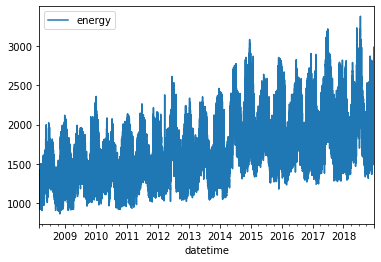

In [13]:
data.plot()

In [14]:
data.interpolate()

,energy
datetime,
2008-03-01 00:00:00,1259.985563
2008-03-01 01:00:00,1095.541500
2008-03-01 02:00:00,1056.247500
2008-03-01 03:00:00,1034.742000
2008-03-01 04:00:00,1026.334500
...,...
2018-12-31 19:00:00,2528.446800
2018-12-31 20:00:00,2461.883600
2018-12-31 21:00:00,2365.994400


In [15]:
#Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [16]:
data = data.dropna()

In [17]:

## Testing For Stationarity

from statsmodels.tsa.stattools import adfuller  


In [18]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(energy):
    result=adfuller(energy)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    
adfuller_test(data['energy'])

ADF Test Statistic : -9.527076482271287
p-value : 2.95812098837329e-16
#Lags Used : 67
Number of Observations Used : 93024
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


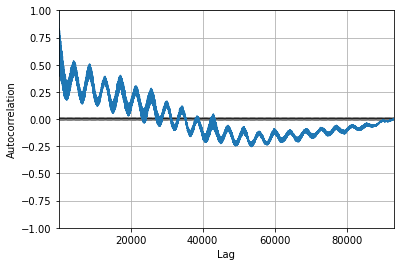

In [19]:
x = pd.plotting.autocorrelation_plot(data['energy'])

In [20]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

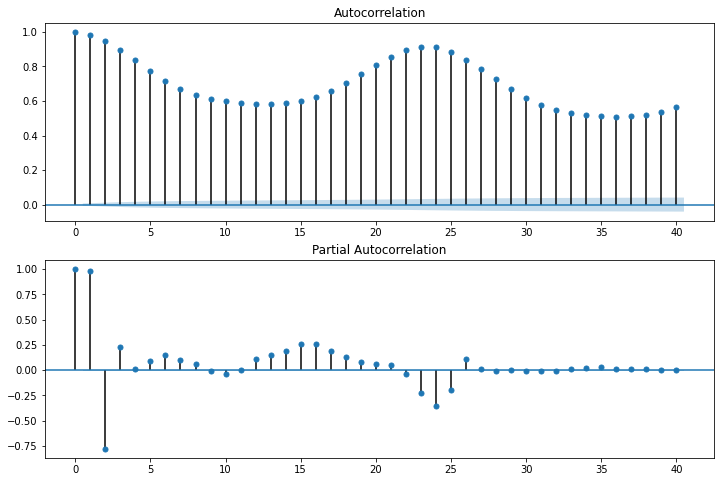

In [21]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['energy'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['energy'],lags=40,ax=ax2)

In [ ]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(data['energy'],order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

In [ ]:
model_fit.summary()


In [ ]:
model_fit.summary()

In [1]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['energy','forecast']].plot(figsize=(12,8))


NameError: ignored